# VISUALIZATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv('desktop/cleaneddata1.csv', encoding = "ISO-8859-1", engine='python')

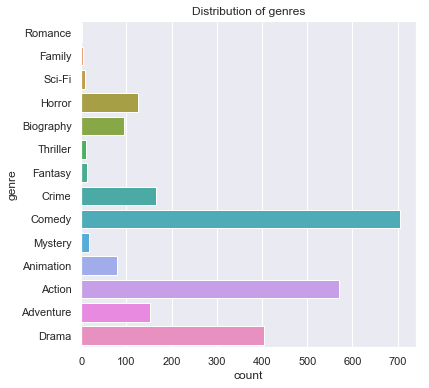

In [3]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title(('Distribution of genres'))
sns.countplot(y='genre',data=df)

From the above plot : Highest number of movies are in "COMEDY GENRE"
Lowest number of movies are in "ROMANCE"

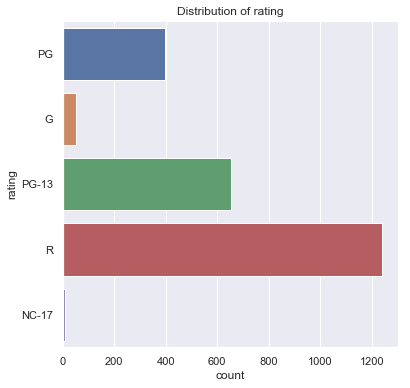

In [4]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title(('Distribution of rating'))
sns.countplot(y='rating',data=df)

From the above plot : Highest number of movies are in "R rated"
Lowest number of movies are in "NC-17"

In [5]:
A=df['score']

In [6]:
for index,row in A.iteritems():
    A.loc[index]=int(row)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


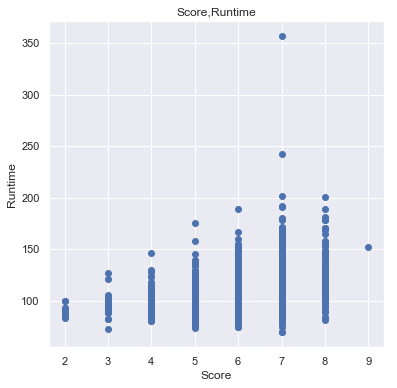

In [11]:
plt.title(('Score,Runtime'))
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.scatter(A,df.runtime)

From the above plot you can infer about the numbers days the movie had been running depending upon the rating given by the people.So,From our data the max number of days that a movie had been running is 350 which has a score in the range of 7-8

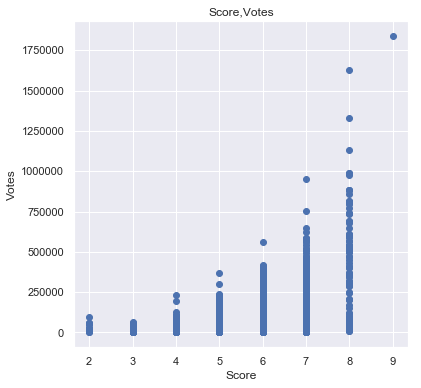

In [12]:
plt.title(('Score,Votes'))
plt.xlabel('Score')
plt.ylabel('Votes')
plt.scatter(A,df.votes)

we can infer that maximum number of people are willing to watch the movie which has highest rating.
So highest rating is 9 and number of people watched the movie is above 17lakhs.

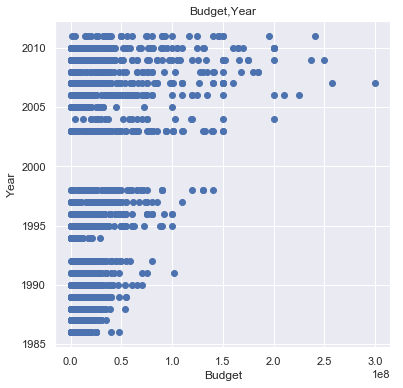

In [16]:
plt.title(('Budget,Year'))
plt.xlabel('Budget')
plt.ylabel('Year')
plt.scatter(df.budget,df.year)

The most budget spent in the year is between 2005-2010.This plot helps you in figuring out the budget spent on the movie in that particular year

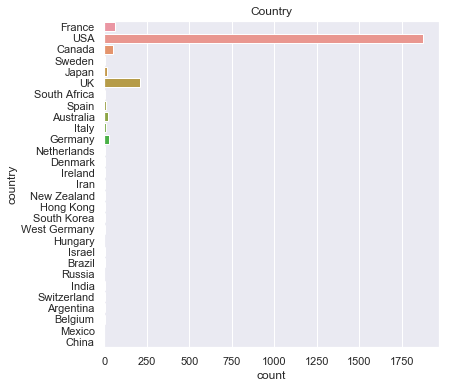

In [42]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title(('Country'))
sns.countplot(y='country',data=df)

In [50]:
A=set()
for index,row in df.genre.iteritems():
    A.add(df.loc[index,'year'])
print(A)


{1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011}


In [52]:
y1=df[df['year']==1986]
y2=df[df['year']==1990]
y3=df[df['year']==1995]
y4=df[df['year']==2003]
y5=df[df['year']==2007]
y6=df[df['year']==2011]


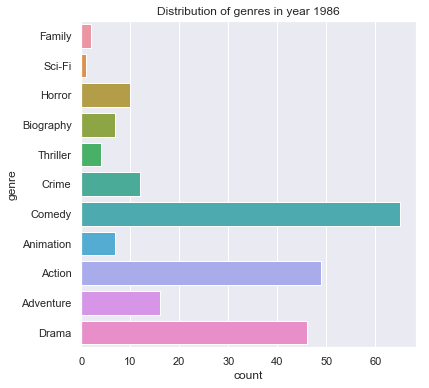

In [53]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title(('Distribution of genres in year 1986'))
sns.countplot(y='genre',data=adven)
    

this hepls u in figuring out the distribution of genres in particular year

(array([655., 356., 156., 136., 232.,   0.,  97.,  64., 329., 328.]),
 array([1986. , 1988.5, 1991. , 1993.5, 1996. , 1998.5, 2001. , 2003.5,
        2006. , 2008.5, 2011. ]),
 <a list of 10 Patch objects>)

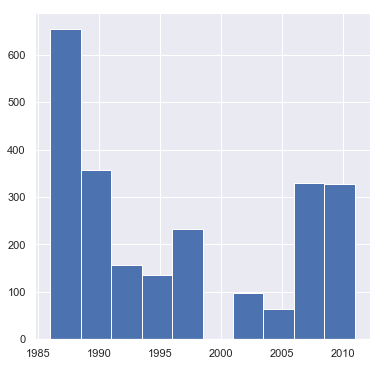

In [54]:
plt.hist(df.year)

From my data set u can get know which movies is the best, based on the people rating , number days it was on theathres and 
the voting helps u to figure out the best movie of the year.

# CORRELATION

In [55]:
df.corr()

,Unnamed: 0,budget,gross,runtime,score,votes,year
Unnamed: 0,1.000000,0.163320,0.131361,0.192639,0.113133,0.129024,0.205677
budget,0.163320,1.000000,0.726609,0.284906,0.152570,0.588862,0.423466
gross,0.131361,0.726609,1.000000,0.235346,0.172959,0.589064,0.303737
runtime,0.192639,0.284906,0.235346,1.000000,0.384439,0.321656,0.153466
score,0.113133,0.152570,0.172959,0.384439,1.000000,0.446273,0.147526
votes,0.129024,0.588862,0.589064,0.321656,0.446273,1.000000,0.402727
year,0.205677,0.423466,0.303737,0.153466,0.147526,0.402727,1.000000


The highest correlation is between budget and gross
The lowset correlation is between score and year

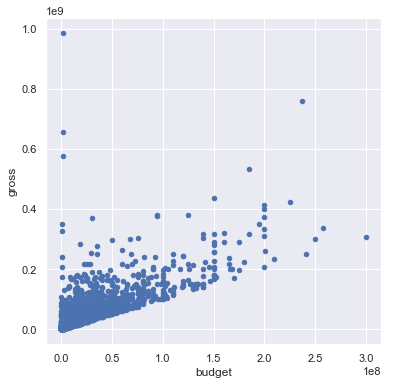

In [57]:
df.plot.scatter(x='budget',y='gross')

This ia Positive Correlation.Positive correlation means that as one data set increases, the other data set increases as well.That means on increase/decrease in gross budget also increases/decreases and vice versa.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X=df['budget'].values.reshape(-1,1)
Y=df['gross'].values.reshape(-1,1)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
c=lr.intercept_
m=lr.coef_
print(c)
print(m)

[20046820.34838653]
[[1.37828992]]


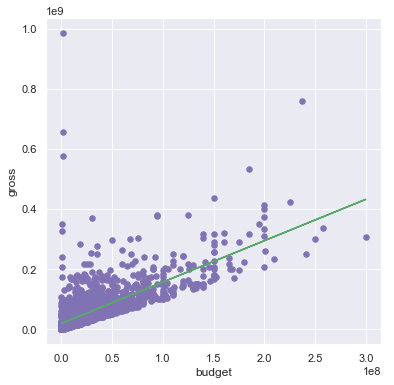

In [65]:
 plt.scatter(X, Y, color = "m", 
               marker = "o", s = 30) 
y_pred = c + m*X
  
    # plotting the regression line 
plt.plot(X, y_pred, color = "g") 
  
    # putting labels 
plt.xlabel('budget') 
plt.ylabel('gross') 
  
    # function to show plot 
plt.show() 

You can infer that there is a relation between  budget and gross  which is linear.and obvio gross means which includes taxes +budget so there is a positive correlation

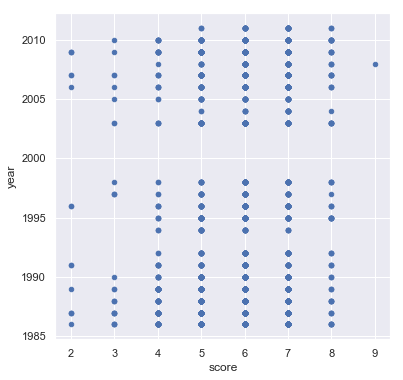

In [58]:
df.plot.scatter(x='score',y='year')

There is no correlation between rating of the movies and the years.